<a href="https://colab.research.google.com/github/pavanreddy0829/Hosting/blob/main/TASK_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Multiple Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [2]:
data = pd.read_csv('50_Startups.csv')

In [3]:
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
data.nunique()

R&D Spend          49
Administration     50
Marketing Spend    48
State               3
Profit             50
dtype: int64

In [7]:
data.shape

(50, 5)

In [8]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [25]:
data=data.drop('State',axis=1)

In [26]:
X=data.iloc[:,:-1].values
Y=data.iloc[:,-1].values

In [27]:
print(X)
print(Y)

[[165349.2  136897.8  471784.1 ]
 [162597.7  151377.59 443898.53]
 [153441.51 101145.55 407934.54]
 [144372.41 118671.85 383199.62]
 [142107.34  91391.77 366168.42]
 [131876.9   99814.71 362861.36]
 [134615.46 147198.87 127716.82]
 [130298.13 145530.06 323876.68]
 [120542.52 148718.95 311613.29]
 [123334.88 108679.17 304981.62]
 [101913.08 110594.11 229160.95]
 [100671.96  91790.61 249744.55]
 [ 93863.75 127320.38 249839.44]
 [ 91992.39 135495.07 252664.93]
 [119943.24 156547.42 256512.92]
 [114523.61 122616.84 261776.23]
 [ 78013.11 121597.55 264346.06]
 [ 94657.16 145077.58 282574.31]
 [ 91749.16 114175.79 294919.57]
 [ 86419.7  153514.11      0.  ]
 [ 76253.86 113867.3  298664.47]
 [ 78389.47 153773.43 299737.29]
 [ 73994.56 122782.75 303319.26]
 [ 67532.53 105751.03 304768.73]
 [ 77044.01  99281.34 140574.81]
 [ 64664.71 139553.16 137962.62]
 [ 75328.87 144135.98 134050.07]
 [ 72107.6  127864.55 353183.81]
 [ 66051.52 182645.56 118148.2 ]
 [ 65605.48 153032.06 107138.38]
 [ 61994.4

In [44]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.2, random_state = 5)

In [45]:
mymodel = model.fit(X_train,Y_train)

In [46]:
Y_train_pred = mymodel.predict(X_train)

Y_test_pred = mymodel.predict(X_test)

In [47]:
print(Y_train_pred)
print(Y_test_pred)

[ 96552.86994685 170451.69050479  96974.92696715 191919.2192127
 110294.28627896 162319.53825002  47513.27256491  89795.60716269
  88678.71464988 109370.53142876  74545.59100578  97583.13007576
 111463.35157691 133934.72495265  64128.42315157 101328.53325163
 128542.53867205 115037.83433325 116709.98824706  48062.40019837
 188561.92172752 133977.08955856 126873.63067186  75137.94803681
  58696.20124059 144787.7892654  128307.05252629 159084.90531907
  47103.50559076  97755.4299605  115421.09596841  83212.0708457
  76049.52748266 151038.90250508 153407.36781149 116672.56259238
  69630.74047569  46127.4448495  148384.89076165  90115.08037834]
[ 70498.13617096 100725.14565713 154926.07466312 112726.45593817
 101147.50890496 129963.034096   180693.06675671  59561.78085581
 172536.75828121 117940.81434023]


In [48]:
df=pd.DataFrame(Y_test_pred,Y_test)
df

,0
71498.49,70498.136171
101004.64,100725.145657
156122.51,154926.074663
122776.86,112726.455938
103282.38,101147.508905
125370.37,129963.034096
191050.39,180693.066757
69758.98,59561.780856
182901.99,172536.758281
111313.02,117940.814340


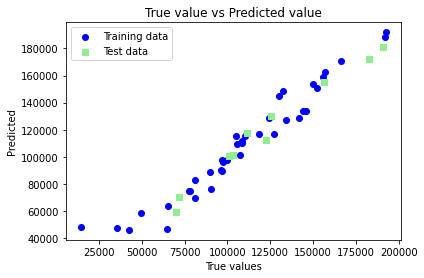

In [49]:
plt.scatter(Y_train ,Y_train_pred,c='blue',marker='o',label='Training data')

plt.scatter(Y_test,Y_test_pred ,c='lightgreen',marker='s',label='Test data')

plt.xlabel('True values')

plt.ylabel('Predicted')

plt.title("True value vs Predicted value")

plt.legend(loc= 'upper left')

#plt.hlines(y=0,xmin=0,xmax=50)

plt.plot()

plt.show()

In [50]:
from sklearn.metrics import mean_squared_error, r2_score  
mse = mean_squared_error(Y_test, Y_test_pred)

print(mse)

49179384.38363871
